### Documentación

Problemas interesantes para Aprendizaje por refuerzo
 * Gymnasium: https://gymnasium.farama.org/environments/box2d/

## Instalación

!pip install gymnasium  
!pip install gymnasium[box2d] 

## Acciones adicionales

### En macos

pip uninstall swig  
xcode-select -—install (si no se tienen ya)  
pip install swig  / sudo port install swig-python
pip install 'gymnasium[box2d]' # en zsh hay que poner las comillas  

### en Windows

Si da error, se debe a la falta de la versión correcta de Microsoft Visual C++ Build Tools, que es una dependencia de Box2D. Para solucionar este problema, puede seguir los siguientes pasos:  
 * Descargar Microsoft Visual C++ Build Tools desde https://visualstudio.microsoft.com/visual-cpp-build-tools/.
 * Dentro de la app, seleccione la opción "Herramientas de compilación de C++" para instalar.
 * Reinicie su sesión en Jupyter Notebook.
 * Ejecute nuevamente el comando !pip install gymnasium[box2d] en la línea de comandos de su notebook.

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import gymnasium.utils.play
import pygame
import time
from gymnasium.wrappers import RecordVideo
import flappy_bird_gymnasium  

from MLP import MLP
from AGLunarLander import AG_Lunar_Lander

%matplotlib inline

## **Human play**

In [ ]:
env = gym.make("FlappyBird-v0", render_mode="rgb_array")

gymnasium.utils.play.play(env, zoom=1.5, keys_to_action={(pygame.K_UP,): 1}, noop=0)

----

## **Agent training**

In [11]:
env = gym.make("FlappyBird-v0", use_lidar=False)
architecture = MLP(layers=[12,8,4,2])
genetic_algorithm = AG_Lunar_Lander(population_size=100, num_ind_exp=5, MLP=architecture, env=env, env_seed=None)

print("model params:", genetic_algorithm.MLP.size)

start = time.time()
GENERATIONS = 1000
genetic_algorithm.evolve(pmut=0.1, pcross=0.7, ngen=GENERATIONS, T=8, trace=50, reverse_sort=True, elitism=False)
minutos, segundos = divmod(time.time()-start, 60)
print(f"*******Tiempo evolución: {int(minutos)} minutos y {segundos:.2f} segundos*******")

best_chromosome = genetic_algorithm.best_global_individual[1]
np.savetxt(f"results_p1/flappy_bird_AG_{GENERATIONS}.txt", best_chromosome)

model params: 150
Nº gen: 0, Best fitness: 4.519999999999998
Nº gen: 50, Best fitness: 8.499999999999996
Nº gen: 100, Best fitness: 9.199999999999992
Nº gen: 150, Best fitness: 7.839999999999987
Nº gen: 200, Best fitness: 7.479999999999988
Nº gen: 250, Best fitness: 9.440000000000008
Nº gen: 300, Best fitness: 8.319999999999988
Nº gen: 350, Best fitness: 7.839999999999998
Nº gen: 400, Best fitness: 8.619999999999985
Nº gen: 450, Best fitness: 8.319999999999986
Nº gen: 500, Best fitness: 9.020000000000007
Nº gen: 550, Best fitness: 9.059999999999988
Nº gen: 600, Best fitness: 8.139999999999988
Nº gen: 650, Best fitness: 7.039999999999989
Nº gen: 700, Best fitness: 10.259999999999982
Nº gen: 750, Best fitness: 12.019999999999985
Nº gen: 800, Best fitness: 6.759999999999991
Nº gen: 850, Best fitness: 8.319999999999997
Nº gen: 900, Best fitness: 8.339999999999986
Nº gen: 950, Best fitness: 7.939999999999988
Nº gen: 999, Best fitness: 8.499999999999984
*******Tiempo evolución: 1 minutos y 5

## **Fitnesses evolution**

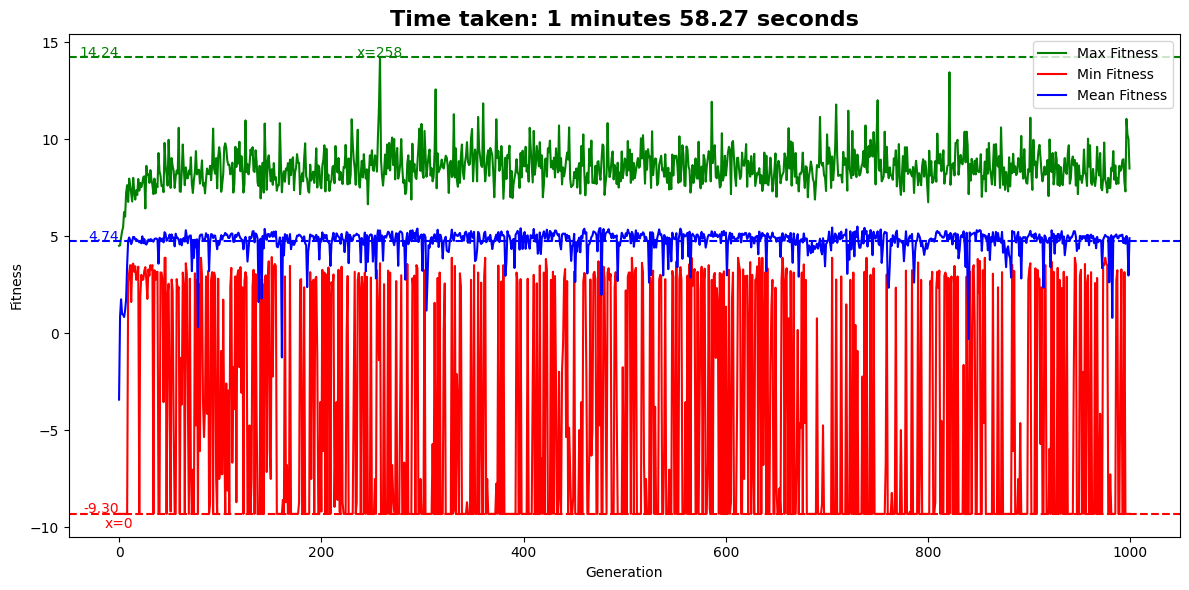

In [12]:
def plot_fitnesses_evolution():
    plt.figure(figsize=(12, 6))
    
    max_fitness = genetic_algorithm.max_fitnesses
    min_fitness = genetic_algorithm.min_fitnesses
    mean_fitness = genetic_algorithm.mean_fitnesses
    
    max_fitness_gen = np.argmax(max_fitness)
    min_fitness_gen = np.argmin(min_fitness)

    # Get current y-axis limits and compute an offset (2% of y-range)
    ax = plt.gca()
    ymin_axis, ymax_axis = ax.get_ylim()
    offset = (ymax_axis - ymin_axis) * 0.02

    # Adjust offsets; change sign as needed (positive: above, negative: below)
    min_offset = -offset-0.7  # places min text below the line
    max_offset = offset   # places max text above the line
    
    plt.plot(max_fitness, label="Max Fitness", color='g')
    plt.axhline(y=max(max_fitness), color='g', linestyle='--')
    plt.text(max_fitness_gen, max(max_fitness) + max_offset, f"x={max_fitness_gen}", color='g', ha="center")
    plt.text(0, max(max_fitness) + max_offset, f'{max(max_fitness):.2f}', color='g', ha='right') # max value
    
    plt.plot(min_fitness, label="Min Fitness", color='r')
    plt.axhline(y=min(min_fitness), color='r', linestyle='--')
    plt.text(min_fitness_gen, min(min_fitness) + min_offset, f"x={min_fitness_gen}", color='r', ha="center")
    plt.text(0, min(min_fitness) + max_offset, f'{min(min_fitness):.2f}', color='r', ha='right') # min value
        
    plt.plot(mean_fitness, label="Mean Fitness", color='b')
    plt.axhline(y=np.mean(mean_fitness), color='b', linestyle='--')
    plt.text(0, np.mean(mean_fitness) + max_offset, f'{np.mean(mean_fitness):.2f}', color='b', ha='right') # mean value
    
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title(f"Time taken: {int(minutos)} minutes {segundos:.2f} seconds", fontsize=16, ha='center', fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"results_p1/flappy_bird_AG_{GENERATIONS}.png")
    plt.show()

plot_fitnesses_evolution()

## **Test best global chromosome**

In [16]:
test_chromosome = np.loadtxt(f"results_p1/flappy_bird_AG_{GENERATIONS}.txt").tolist()
test_model = architecture # previously defined MLP architecture
test_model.from_chromosome(test_chromosome)

num_episodes_test = 3
destiny_folder = "results_p1/videos"
test_env = gym.make("FlappyBird-v0", render_mode="rgb_array", use_lidar=False)
test_env = RecordVideo(test_env, video_folder=destiny_folder, name_prefix=f"FB-AG-{GENERATIONS}", episode_trigger=lambda x: x < num_episodes_test)  

def policy(observation):
    s = test_model.forward(observation)
    action = np.argmax(s)
    return action

for episode in range(num_episodes_test):
    state, _ = test_env.reset()
    done = False
    total_reward = 0
    
    while not done:
        action = policy(state)  
        next_state, reward, done, _, _ = test_env.step(action) 
        total_reward += reward
        state = next_state

        if done:
            print(f"Episode {episode}: Episode Reward = {total_reward}")

test_env.close()

Episode 0: Episode Reward = 3.8999999999999986
Episode 1: Episode Reward = 3.8999999999999986
Episode 2: Episode Reward = 3.8999999999999986


## **¿No has tenido bastante?**

Prueba a controlar el flappy bird https://github.com/markub3327/flappy-bird-gymnasium

pip install flappy-bird-gymnasium

import flappy_bird_gymnasium  
env = gym.make("FlappyBird-v0")

Estado (12 variables):
  * the last pipe's horizontal position
  * the last top pipe's vertical position
  * the last bottom pipe's vertical position
  * the next pipe's horizontal position
  * the next top pipe's vertical position
  * he next bottom pipe's vertical position
  * the next next pipe's horizontal position
  * the next next top pipe's vertical position
  * the next next bottom pipe's vertical position
  * player's vertical position
  * player's vertical velocity
  * player's rotation

  Acciones:
  * 0 -> no hacer nada
  * 1 -> volar